In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd 'drive/My Drive/Colab Notebooks/ml_p7/'

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/ml_p7/'
/content/drive/My Drive/Colab Notebooks/ml_p7


In [7]:
ls

customers.csv  iris.csv  MLCSS344seventh.ipynb


# K - Means Clustering

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

%matplotlib inline

In [10]:
cust = pd.read_csv("customers.csv")
cust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
cust.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
cust.duplicated().sum()

0

In [14]:
cust.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [0]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [17]:
spending = cust["Spending Score (1-100)"]
statistics(spending)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending Score (1-100),50.2,25.758882,50.0,663.52


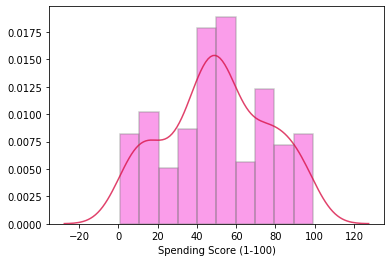

In [19]:
sns.distplot(cust["Spending Score (1-100)"], bins=10, kde_kws={"lw": 1.5, "alpha":0.8, "color":list(map(float, np.random.rand(3,)))},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":list(map(float, np.random.rand(3,)))})

In [18]:
income = cust["Annual Income (k$)"]
statistics(income)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Annual Income (k$),60.56,26.198977,61.5,686.3864


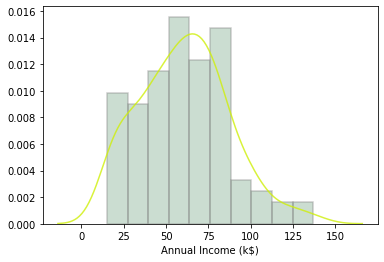

In [20]:
sns.distplot(cust["Annual Income (k$)"], bins=10, kde_kws={"lw": 1.5, "alpha":0.8, "color":list(map(float, np.random.rand(3,)))},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":list(map(float, np.random.rand(3,)))})

In [22]:
gender = cust["Gender"]
statistics(gender)

,Gender
Female,112
Male,88


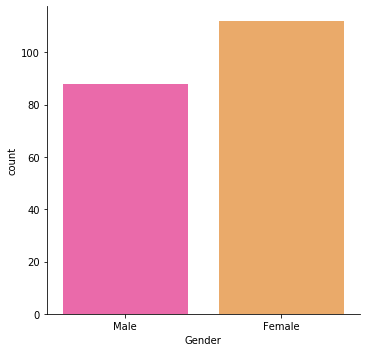

In [25]:
gender = pd.DataFrame(cust["Gender"])
sns.catplot(x=gender.columns[0], kind="count", palette="spring", data=gender)

In [26]:
dummies = pd.get_dummies(cust['Gender'])
dummies

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [27]:
cust = cust.merge(dummies, left_index=True, right_index=True)
cust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,1,0
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,0,1


In [28]:
new_cust = cust.iloc[:,2:]
new_cust

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


#### WCSS = Within Cluster Sum of Squares. The goal is to minimize WCSS using K-Means Clustering Algorithm

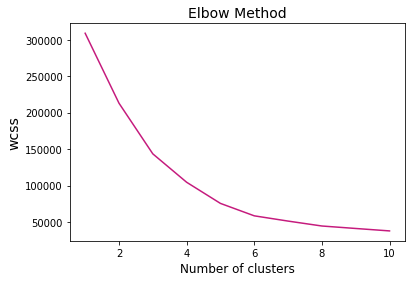

In [31]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(new_cust)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

In [0]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

In [33]:
kmeans.fit(new_cust)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [34]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ["Age", "Annual Income", "Spending", "Male", "Female"])
centroids.index_name = "ClusterID"
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)
centroids

,Age,Annual Income,Spending,Male,Female,ClusterID
0,45.217391,26.304348,20.913043,0.608696,0.391304,0
1,32.692308,86.538462,82.128205,0.538462,0.461538,1
2,43.088608,55.291139,49.569620,0.582278,0.417722,2
3,40.666667,87.750000,17.583333,0.472222,0.527778,3
4,25.521739,26.304348,78.565217,0.608696,0.391304,4


In [36]:
X_new = np.array([[43, 76, 56, 0, 1]]) 
 
new_customer = kmeans.predict(X_new)
print(f"The new customer belongs to segment(Cluster) {new_customer[0]}")

The new customer belongs to segment(Cluster) 2


# Hierarchical Clustering

In [0]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

In [38]:
scalar = StandardScaler().fit(new_cust)
X = scalar.transform(new_cust)
X

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

In [39]:
distxy = squareform(pdist(X, metric='euclidean'))
links = linkage(distxy, method='complete', metric='euclidean')

print(distxy)
print(links)

[[0.         1.63681098 3.12485794 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         4.07443301 ... 4.3182849  5.31878915 4.70189264]
 [3.12485794 4.07443301 0.         ... 5.78411589 5.51417485 6.23683863]
 ...
 [4.54611614 4.3182849  5.78411589 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 5.51417485 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 6.23683863 ... 0.5647686  2.5274803  0.        ]]
[[3.00000000e+00 5.00000000e+00 3.95514768e-01 2.00000000e+00]
 [1.29000000e+02 1.31000000e+02 4.26081870e-01 2.00000000e+00]
 [6.50000000e+01 6.80000000e+01 5.73339431e-01 2.00000000e+00]
 [6.00000000e+01 7.00000000e+01 6.04918571e-01 2.00000000e+00]
 [1.14000000e+02 1.15000000e+02 7.75008163e-01 2.00000000e+00]
 [1.47000000e+02 1.59000000e+02 8.55621048e-01 2.00000000e+00]
 [1.17000000e+02 1.19000000e+02 8.75632942e-01 2.00000000e+00]
 [1.12000000e+02 1.21000000e+02 9.64526499e-01 2.00000000e+00]
 [4.80000000e+01 4.90000000e+01 1.01137307e+00 2.000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'c',
  'c',
  'c',
  'm',
  'm',
  'm',
  'm',
  'm',
  'b',
  'b',
  'b'],
 'dcoord': [[0.0, 13.35224580531137, 13.35224580531137, 0.0],
  [0.0, 11.735918555502323, 11.735918555502323, 0.0],
  [0.0, 15.121393780042062, 15.121393780042062, 11.735918555502323],
  [13.35224580531137,
   19.893099737354532,
   19.893099737354532,
   15.121393780042062],
  [0.0, 15.683659950305417, 15.683659950305417, 0.0],
  [0.0, 19.752849624088658, 19.752849624088658, 15.683659950305417],
  [0.0, 13.117709852518944, 13.117709852518944, 0.0],
  [0.0, 13.84741764200774, 13.84741764200774, 0.0],
  [13.117709852518944,
   15.765986055359983,
   15.765986055359983,
   13.84741764200774],
  [0.0, 20.403944450443888, 20.403944450443888, 15.765986055359983],
  [19.752849624088658,
   22.883731468685898,
   22.883731468685898,
   20.403944450443888],
  [19.893099737354532,
   23.888834579596043,
   23.88883

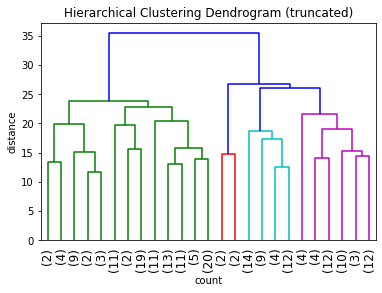

In [40]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('count')
plt.ylabel('distance')
dendrogram(links, truncate_mode='lastp', p=25, show_leaf_counts=True, leaf_rotation=90, leaf_font_size=12)